In [1]:
import inspect
import time
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("/Users/mac/Downloads/LOAN SHEET.xlsx")

In [3]:
df.dtypes

ARRANGEMENT_ID           object
CUSTOMER_ID               int64
ACCOUNT_ID                int64
SETTLEMENT_ACCOUNT      float64
CATEGORY                float64
PRODUCT_NAME             object
EMPLOYER_NAME            object
SECTOR_DESCRIPTION       object
BVN                     float64
VALUE_DATE                int64
START_DATE              float64
MATURITY_DATE             int64
PHONE_NUM                object
DISBURSED_AMOUNT         object
DISBURSED_AMOUNT.1       object
ORIGINAL_DISB_AMOUNT    float64
MONTHLY_PRINCIPAL       float64
MONTHLY_INTEREST        float64
TERM                     object
OUTSTANDING_AMOUNT      float64
PAID_AMOUNT             float64
NO_IN_ARREARS           float64
PRIN_ARREARS            float64
INT_ARREARS             float64
CHARGE_ARREARS          float64
PD_START_DATE           float64
PD_DPD                  float64
PAR_PRINCIPAL           float64
OFFICER_NAME             object
CLASSIFICATION           object
ACCOUNT_OFFICER_CODE      int64
REPORT_D

In [4]:
df.rename(columns={'DISBURSED_AMOUNT.1': 'DISBURSED__AMOUNT'}, inplace=True)

In [5]:
df.dtypes

ARRANGEMENT_ID           object
CUSTOMER_ID               int64
ACCOUNT_ID                int64
SETTLEMENT_ACCOUNT      float64
CATEGORY                float64
PRODUCT_NAME             object
EMPLOYER_NAME            object
SECTOR_DESCRIPTION       object
BVN                     float64
VALUE_DATE                int64
START_DATE              float64
MATURITY_DATE             int64
PHONE_NUM                object
DISBURSED_AMOUNT         object
DISBURSED__AMOUNT        object
ORIGINAL_DISB_AMOUNT    float64
MONTHLY_PRINCIPAL       float64
MONTHLY_INTEREST        float64
TERM                     object
OUTSTANDING_AMOUNT      float64
PAID_AMOUNT             float64
NO_IN_ARREARS           float64
PRIN_ARREARS            float64
INT_ARREARS             float64
CHARGE_ARREARS          float64
PD_START_DATE           float64
PD_DPD                  float64
PAR_PRINCIPAL           float64
OFFICER_NAME             object
CLASSIFICATION           object
ACCOUNT_OFFICER_CODE      int64
REPORT_D

In [6]:
# Converting columns to appropriate datatypes
df['ARRANGEMENT_ID'] = df['ARRANGEMENT_ID'].astype(str)
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype(int)
df['ACCOUNT_ID'] = df['ACCOUNT_ID'].astype(int)
df['SETTLEMENT_ACCOUNT'] = df['SETTLEMENT_ACCOUNT'].astype(float)
df['CATEGORY'] = df['CATEGORY'].astype(float)
df['PRODUCT_NAME'] = df['PRODUCT_NAME'].astype(str)
df["EMPLOYER_NAME"] = df["EMPLOYER_NAME"].astype(str)
df['SECTOR_DESCRIPTION'] = df['SECTOR_DESCRIPTION'].astype(str)
df['BVN'] = df['BVN'].astype(float)
df['VALUE_DATE'] = pd.to_datetime(df['VALUE_DATE'], format='%Y%m%d', errors='coerce')
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%Y%m%d', errors='coerce')
df['MATURITY_DATE'] = pd.to_datetime(df['MATURITY_DATE'], format='%Y%m%d', errors='coerce')
df['PHONE_NUM'] = df['PHONE_NUM'].astype(str)
df['DISBURSED__AMOUNT'] = pd.to_numeric(df['DISBURSED__AMOUNT'].str.replace(',', ''), errors='coerce')
df['ORIGINAL_DISB_AMOUNT'] = df['ORIGINAL_DISB_AMOUNT'].astype(float)
df['MONTHLY_PRINCIPAL'] = df['MONTHLY_PRINCIPAL'].astype(float)
df['MONTHLY_INTEREST'] = df['MONTHLY_INTEREST'].astype(float)
df['TERM'] = df['TERM'].astype(str)
df['OUTSTANDING_AMOUNT'] = df['OUTSTANDING_AMOUNT'].astype(float)
df['PAID_AMOUNT'] = df['PAID_AMOUNT'].astype(float)
df['NO_IN_ARREARS'] = df['NO_IN_ARREARS'].astype(float)
df['PRIN_ARREARS'] = df['PRIN_ARREARS'].astype(float)
df['INT_ARREARS'] = df['INT_ARREARS'].astype(float)
df['CHARGE_ARREARS'] = df['CHARGE_ARREARS'].astype(float)
df['PD_START_DATE'] = pd.to_datetime(df['PD_START_DATE'], format='%Y%m%d', errors='coerce')
df['PD_DPD'] = df['PD_DPD'].astype(float)
df['PAR_PRINCIPAL'] = df['PAR_PRINCIPAL'].astype(float)
df['OFFICER_NAME'] = df['OFFICER_NAME'].astype(str)
df['CLASSIFICATION'] = df['CLASSIFICATION'].astype(str)
df['ACCOUNT_OFFICER_CODE'] = df['ACCOUNT_OFFICER_CODE'].astype(int)
df['REPORT_DATE'] = pd.to_datetime(df['REPORT_DATE'], format='%Y%m%d', errors='coerce')
df['INTEREST_RATE'] = df['INTEREST_RATE'].astype(float)
df['LOAN_TYPE'] = df['LOAN_TYPE'].astype(str)
df['GENDER'] = df['GENDER'].astype(str)
df['ADDRESS'] = df['ADDRESS'].astype(str)
df['ORACLE/IPPIS'] = df['ORACLE/IPPIS'].astype(str)
df['CCY'] = df['CCY'].astype(str)
df['MEANS_OF_REPAY'] = df['MEANS_OF_REPAY'].astype(str)
df['LAST_PAYMENT_DATE'] = pd.to_datetime(df['LAST_PAYMENT_DATE'], format='%Y%m%d', errors='coerce')
df['LAST_PAYMENT_AMOUNT'] = df['LAST_PAYMENT_AMOUNT'].astype(float)
df['DIRECT_LOAN_ID'] = df['DIRECT_LOAN_ID'].astype(str)
df['LD_ID'] = df['LD_ID'].astype(str)
df['CUSTOMER_NAME'] = df['CUSTOMER_NAME'].astype(str)
df['AGE'] = df['AGE'].astype(float)
df['AGE_GROUP'] = df['AGE_GROUP'].astype(str)

In [7]:
# Filter data to include only dates between 2021 and 2023
start_date = '2021-01-01'
end_date = '2023-12-31'
filtered_df = df[(df['VALUE_DATE'] >= start_date) & (df['VALUE_DATE'] <= end_date)]

# Display or save the filtered data
print(filtered_df)

      ARRANGEMENT_ID  CUSTOMER_ID  ACCOUNT_ID  SETTLEMENT_ACCOUNT  CATEGORY  \
0       AA21230FQSWR       166305  1003042757        1.002904e+09    1001.0   
1       AA21231091TJ       172820  1003044184        1.003038e+09    1001.0   
2       AA212312D5F0       147875  1003043895        1.002916e+09    1001.0   
3       AA212312Y60G       137759  1003043541        1.002315e+09    1001.0   
4       AA2123131C65       135564  1003044191        1.002761e+09    1001.0   
...              ...          ...         ...                 ...       ...   
35411   LD2121099928       172172  1002906135                 NaN   21072.0   
35412   LD2121124608       136691  1002969994                 NaN   21073.0   
35413   LD2121129099       143101  1002286824                 NaN   21062.0   
35414   LD2121142706       144304  1002440466                 NaN   21062.0   
35415   LD2121183077       150711  1002397003                 NaN   21073.0   

                         PRODUCT_NAME              

In [8]:
print(filtered_df['VALUE_DATE'].head()) 

0   2021-08-11
1   2021-08-06
2   2021-08-06
3   2021-08-13
4   2021-08-04
Name: VALUE_DATE, dtype: datetime64[ns]


In [9]:
print(filtered_df['DISBURSED__AMOUNT'].head(20))

0       75000.0
1      250000.0
2      295000.0
3     1000000.0
4      100000.0
5      170000.0
6      200000.0
7      150000.0
8      100000.0
9      470000.0
10     150000.0
11     105000.0
12    9900000.0
13     100000.0
14     300000.0
15      50000.0
16     150000.0
17     200000.0
18     250000.0
19     410000.0
Name: DISBURSED__AMOUNT, dtype: float64


In [10]:
filtered_df['DISBURSED__AMOUNT'].fillna(0, inplace=True)

Customer Demographics

In [11]:
filtered_df['AGE_GROUP'] = filtered_df['AGE_GROUP'].replace('nan', 'Unidentified')

In [12]:
print(filtered_df['AGE_GROUP'].value_counts()) 

AGE_GROUP
Middle Aged     17766
Advanced         6205
Unidentified     1863
Young            1247
Under Aged         63
Elderly            20
Name: count, dtype: int64


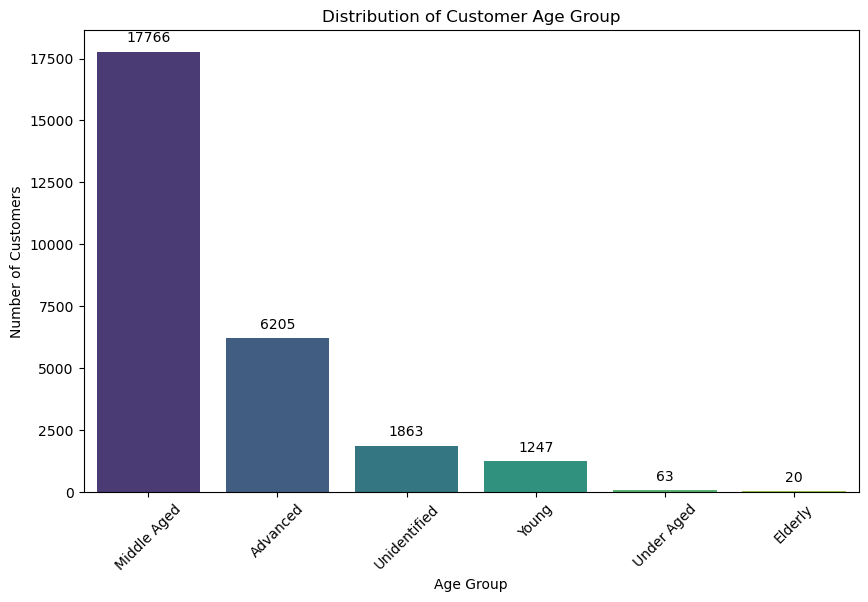

In [13]:
# Distribution of our customer's age group
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='AGE_GROUP', data=filtered_df, order=filtered_df['AGE_GROUP'].value_counts().index, palette='viridis')

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of Customer Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

The above visual shows the distribution of the age group amongst our customers. A large number of the customer's age group could not be determined and has been tagged as 'Unidentified'.

In [14]:
filtered_df['GENDER'] = filtered_df['GENDER'].replace('nan', 'Unidentified')

In [15]:
print(filtered_df['GENDER'].value_counts())

GENDER
MALE            17778
Unidentified     4706
FEMALE           4615
OTHER              65
Name: count, dtype: int64


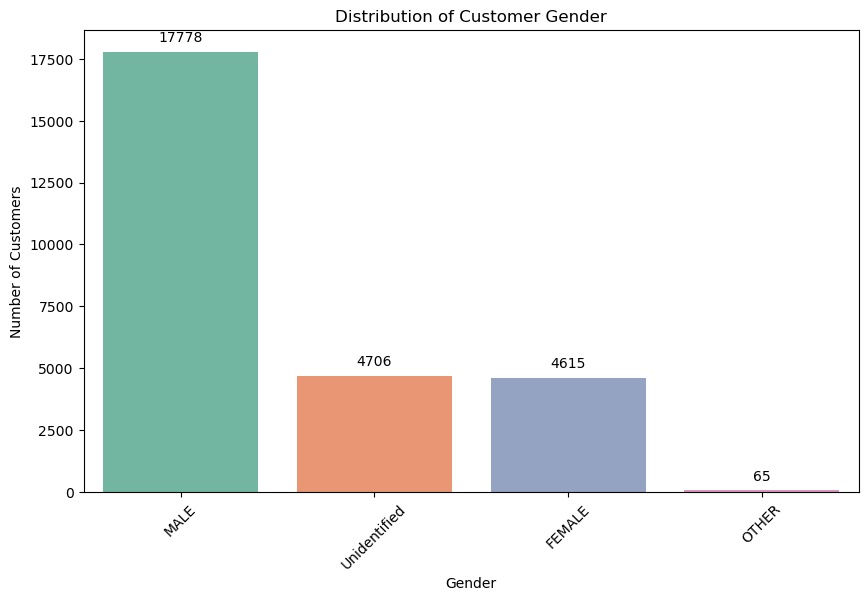

In [16]:
# Distribution of our customer's gender
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='GENDER', data=filtered_df, order=filtered_df['GENDER'].value_counts().index, palette='Set2')

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

The above visual shows the distribution of customers' gender. 4706 of these customers' gender could not be determined due to bad data entry and has been tagged as 'Unidentified'.

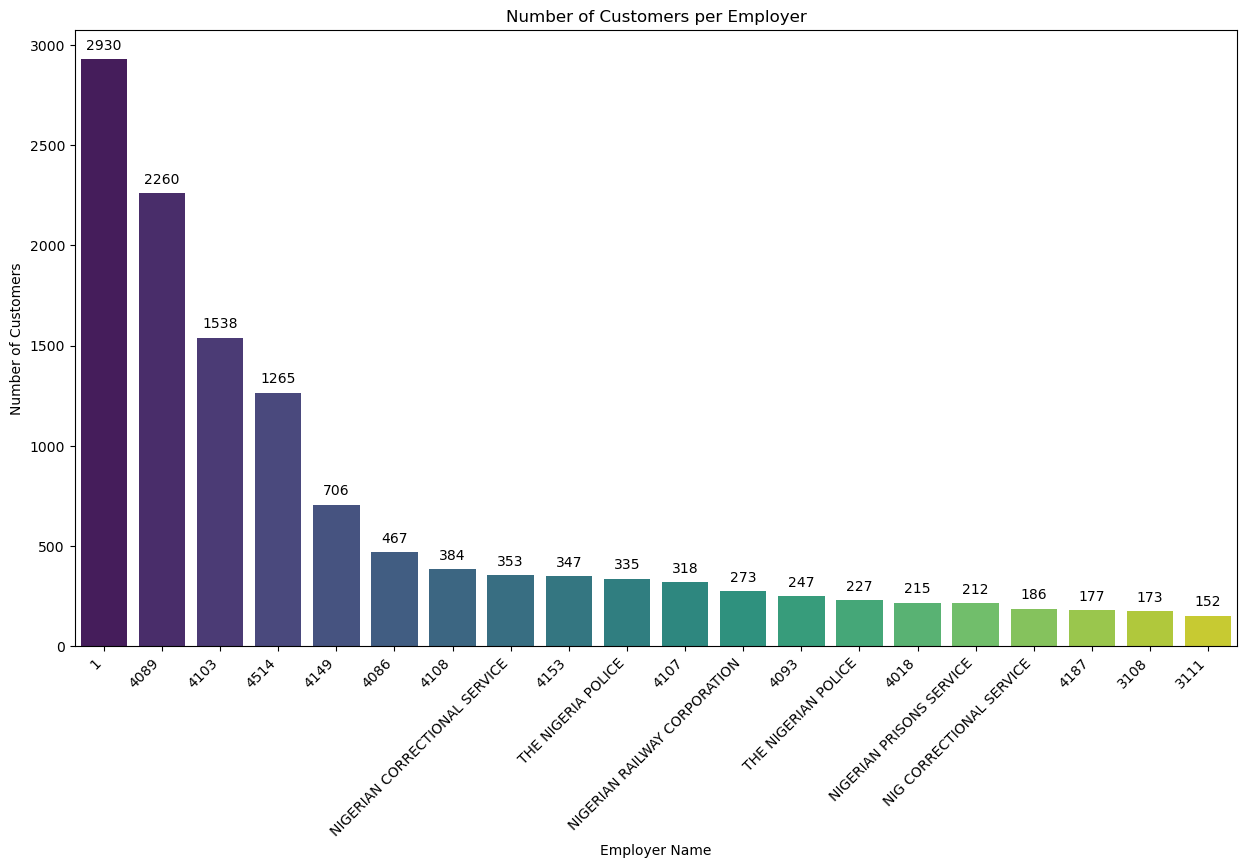

In [17]:
#Number of customers for each Employer
customers_by_employer = filtered_df.groupby('EMPLOYER_NAME')['CUSTOMER_ID'].nunique().nlargest(20)
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=customers_by_employer.index, y=customers_by_employer.values, palette='viridis')

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Number of Customers per Employer')
plt.xlabel('Employer Name')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

The above visual shows the distribution of customers across the top 20 employers

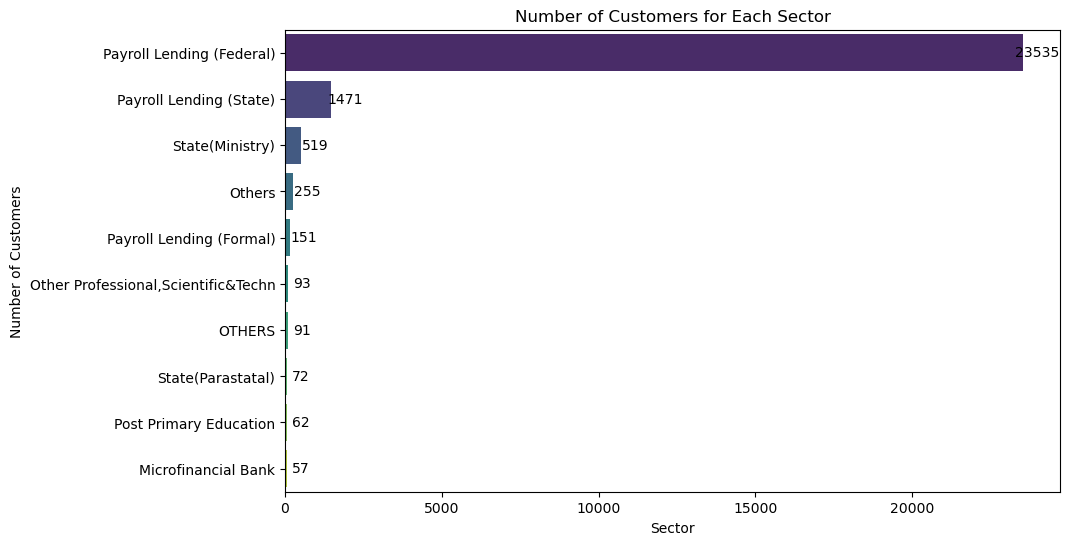

In [18]:
# Number of customers for each sector
customers_by_sector = filtered_df.groupby('SECTOR_DESCRIPTION')['CUSTOMER_ID'].nunique().nlargest(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=customers_by_sector.values, y=customers_by_sector.index,orient='h', palette='viridis')

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (10, 0), 
                textcoords = 'offset points')
    
plt.title('Number of Customers for Each Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Customers')
plt.show()

The above visual shows the distribution of customers across diffrent sectors of the bank with the highest as payroll Lending (Federal)

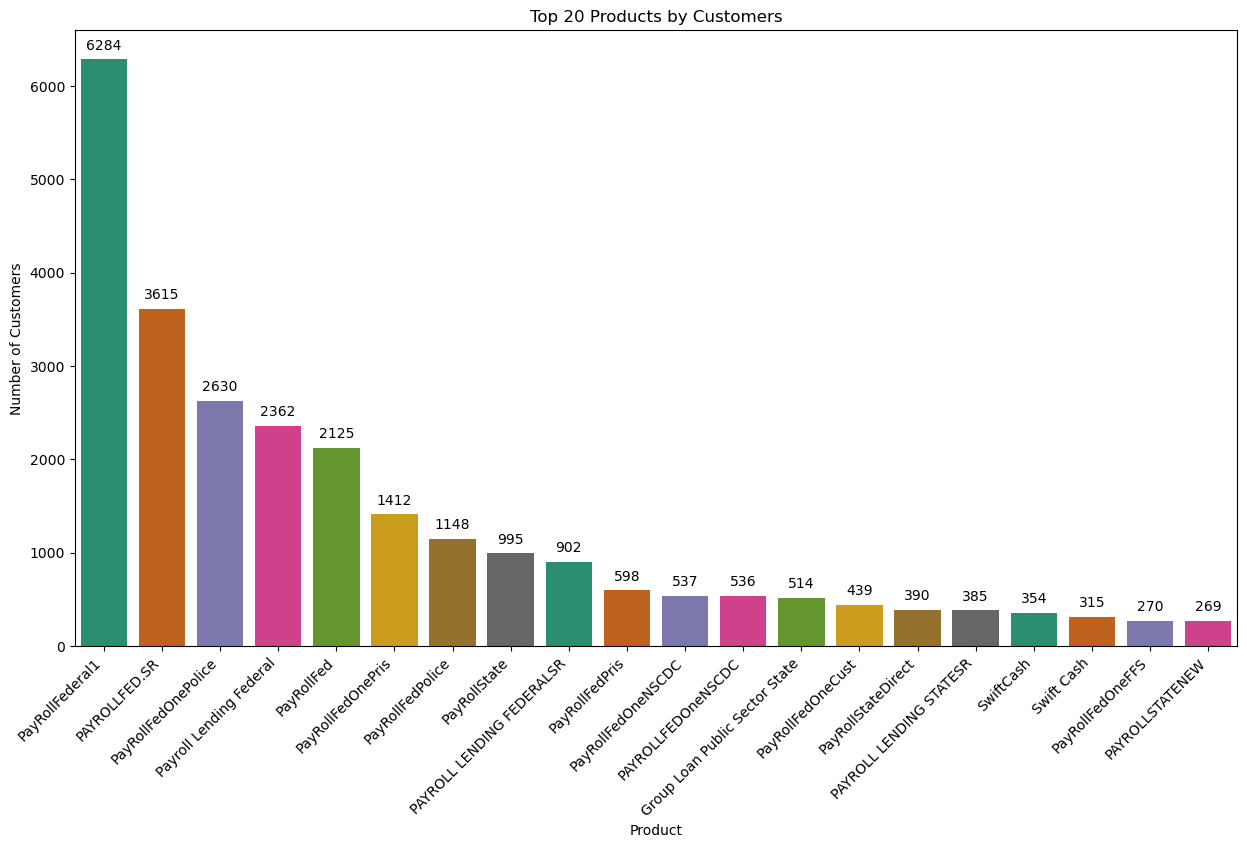

In [19]:
#Number of customers for each Product
customers_by_employer = filtered_df.groupby('PRODUCT_NAME')['CUSTOMER_ID'].nunique().nlargest(20)
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=customers_by_employer.index, y=customers_by_employer.values, palette='Dark2')

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plt.title('Top 20 Products by Customers')
plt.xlabel('Product')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

The above visual shows the distribution of customers across diffrent products of the bank and the product with the largest number of customers is PayRoll Federal1 with 6284 customers followed by Payroll FedSR, Payroll Lending Federal, PayRoll FedOne Police, and PayRollFed respectively.

LOAN DISTRIBUTION

In [20]:
#regularizing the diffrent types of loan classification
replace_dict = {'Lost':'LOST', 'Performing':'PERFORMING', 'Doubtful':'DOUBTFUL', 'Substandard':'SUBSTANDARD', 'Pass & Watch':'PASS & WATCH'}
filtered_df['CLASSIFICATION'] = filtered_df.CLASSIFICATION.replace(replace_dict)
filtered_df.CLASSIFICATION.head()

0     PERFORMING
1           LOST
2    SUBSTANDARD
3     PERFORMING
4     PERFORMING
Name: CLASSIFICATION, dtype: object

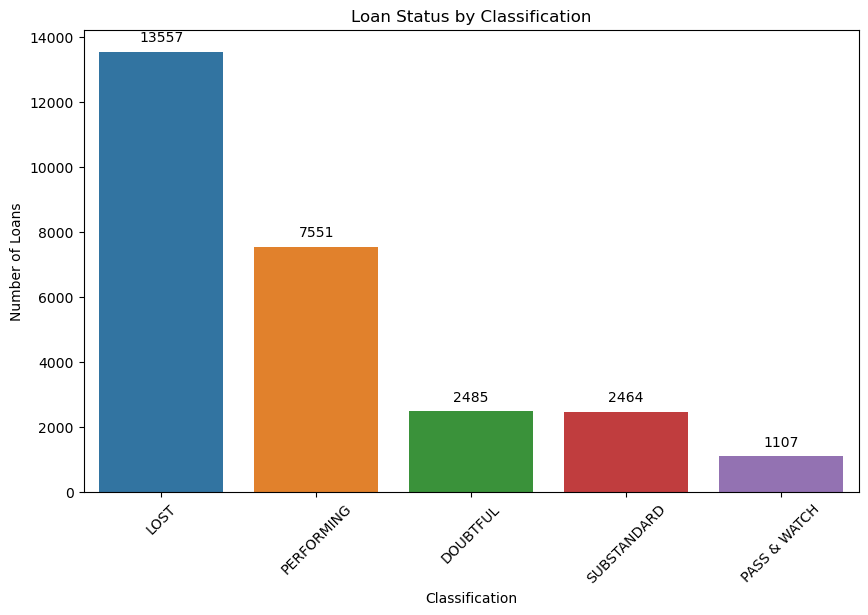

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CLASSIFICATION', data=filtered_df, order=filtered_df['CLASSIFICATION'].value_counts().index, palette='tab10')

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plt.title('Loan Status by Classification')
plt.xlabel('Classification')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.show()

The above visual shows the classification of loans disbursed by the bank with the largest number of Loans classified as lost.

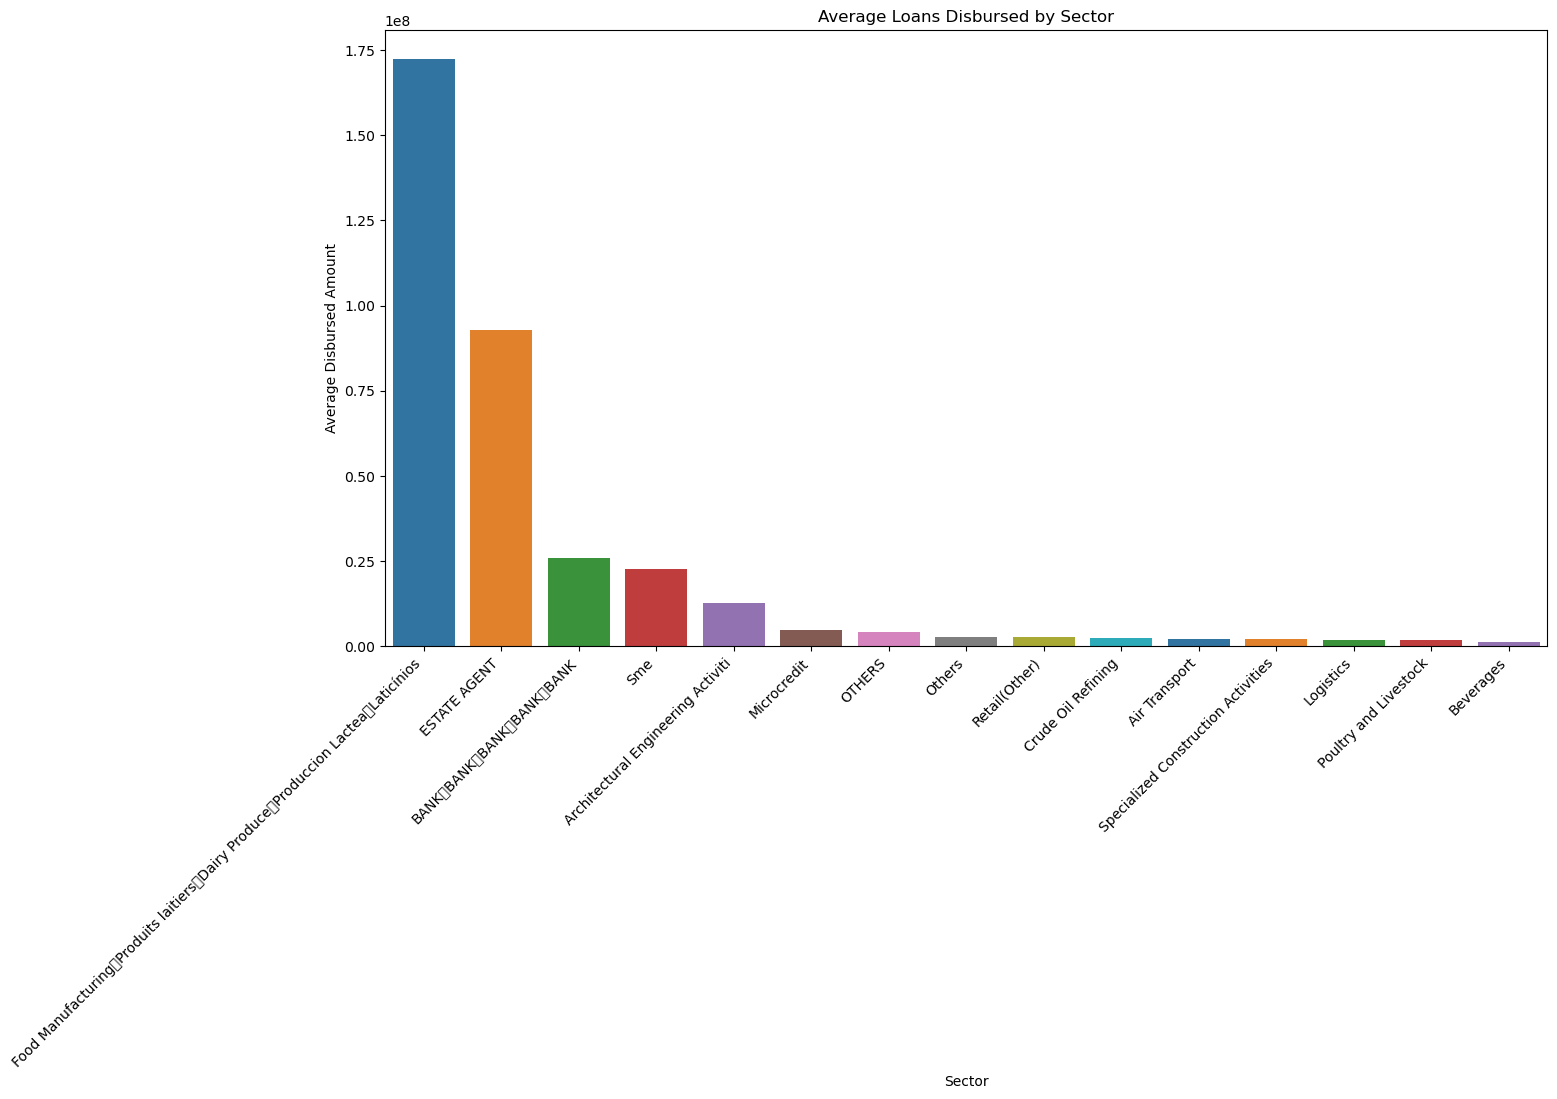

In [22]:
# Average loans disbursed by sector
average_disbursed_by_sector = filtered_df.groupby('SECTOR_DESCRIPTION')['DISBURSED__AMOUNT'].mean().nlargest(15)
plt.figure(figsize=(15, 8))
sns.barplot(x=average_disbursed_by_sector.index, y=average_disbursed_by_sector.values, palette='tab10')
plt.title('Average Loans Disbursed by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Disbursed Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

The above visual shows the avergae distribution of loans across diffrent sectors of the bank with Agric sector having the highest average loan disbursed (calculation is done in 1e8 i.e 100,000,000).

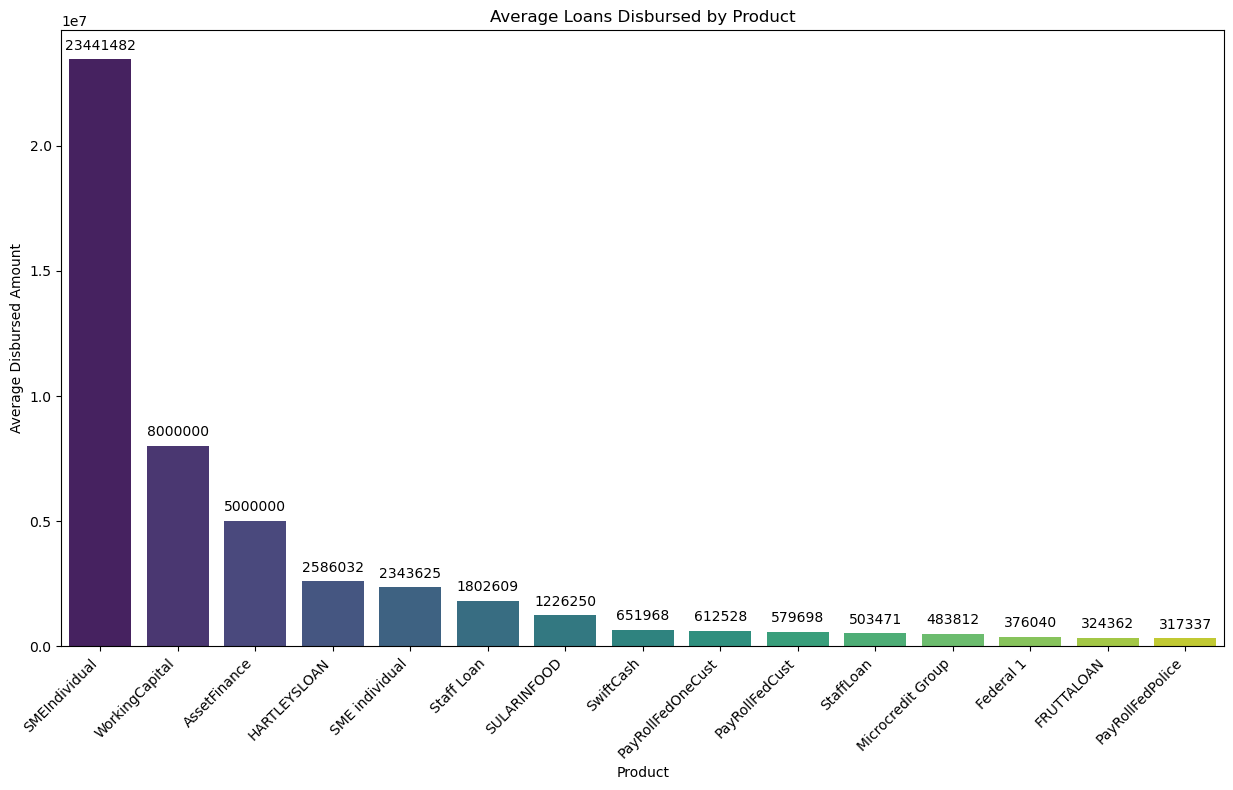

In [23]:
# Average loans disbursed by product
total_disbursed_by_product = filtered_df.groupby('PRODUCT_NAME')['DISBURSED__AMOUNT'].mean().nlargest(15)
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=total_disbursed_by_product.index, y=total_disbursed_by_product.values, palette='viridis')

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plt.title('Average Loans Disbursed by Product')
plt.xlabel('Product')
plt.ylabel('Average Disbursed Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

The above visual shows the avergae distribution of loans across diffrent products of the bank with SME Individual loans as the highest average loan disbursed (calculation is done in 1e7 i.e 10,000,000).

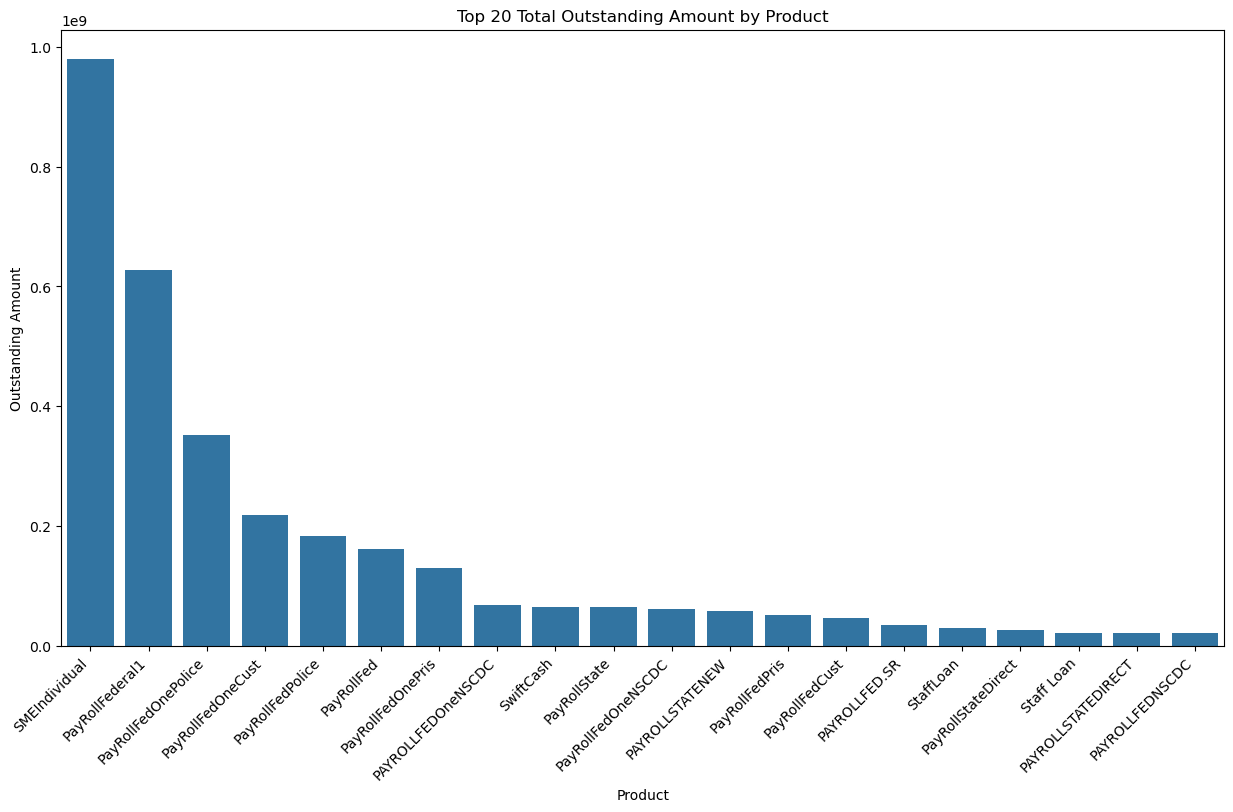

In [24]:
# Total outstanding loan amount by product name
outstanding_by_product = filtered_df.groupby('PRODUCT_NAME')['OUTSTANDING_AMOUNT'].sum().nlargest(20)
plt.figure(figsize=(15, 8))
sns.barplot(x=outstanding_by_product.index, y=outstanding_by_product.values)
plt.title('Top 20 Total Outstanding Amount by Product')
plt.xlabel('Product')
plt.ylabel('Outstanding Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

The above visual shows the total distribution of outstanding loan amounts across diffrent products of the bank with SME Individual having the highest outstanding loan amount. This is expected as SME Individual has the highest average loan disbursed. (calculation is done in 1e9 i.e 1,000,000,000).

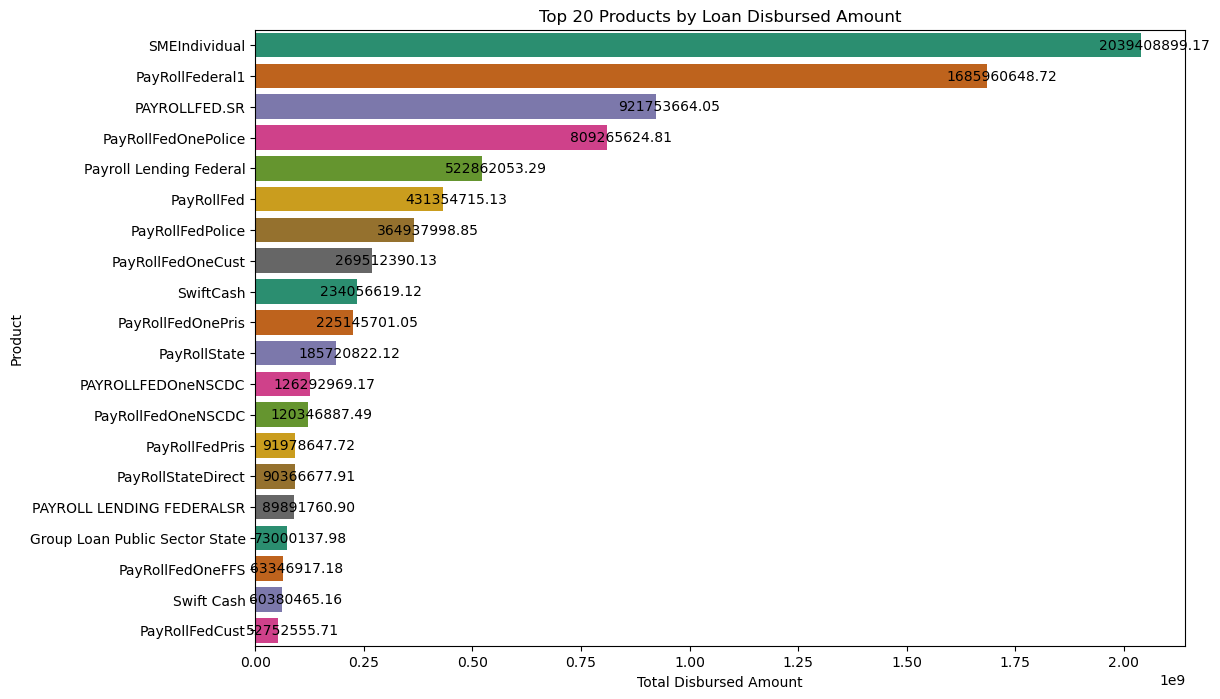

In [25]:
# Total amount disbursed for each product
product_disbursed = filtered_df.groupby('PRODUCT_NAME')['DISBURSED__AMOUNT'].sum().reset_index()

# Sort the values for better visualization
product_disbursed = product_disbursed.sort_values(by='DISBURSED__AMOUNT', ascending=False)

# Select top 20 products
top_20_products = product_disbursed.head(20)

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='PRODUCT_NAME', x='DISBURSED__AMOUNT', data=top_20_products, palette='Dark2')

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (10, 0), 
                textcoords = 'offset points')

plt.title('Top 20 Products by Loan Disbursed Amount')
plt.xlabel('Total Disbursed Amount')
plt.ylabel('Product')
plt.show()

The above visual shows the sum distribution of loans across diffrent products of the bank with SME Individual loans as the highest total loan disbursed (calculation is done in 1e9 i.e 1,000,000,000).

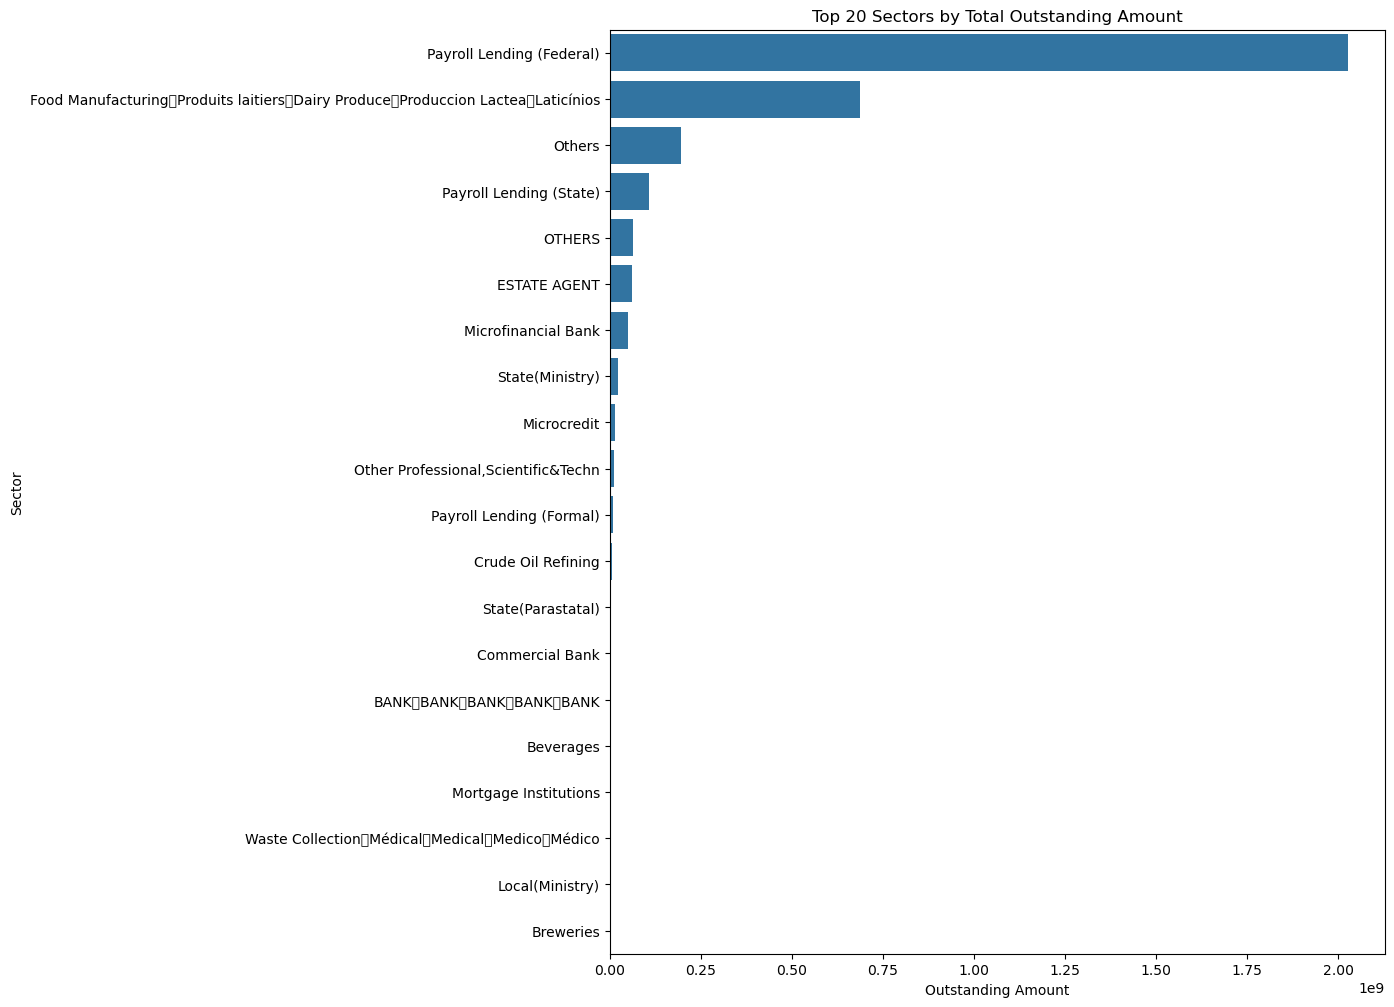

In [26]:
# Total outstanding amount by sector
outstanding_by_sector = filtered_df.groupby('SECTOR_DESCRIPTION')['OUTSTANDING_AMOUNT'].sum()

# Sort the values and select the top 20
top_20_outstanding_by_sector = outstanding_by_sector.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 12))
sns.barplot(y=top_20_outstanding_by_sector.index, x=top_20_outstanding_by_sector.values)
plt.title('Top 20 Sectors by Total Outstanding Amount')
plt.xlabel('Outstanding Amount')
plt.ylabel('Sector')
plt.show()

The above visual shows the total distribution of outstanding loan amounts across diffrent sectors of the bank with PayRoll Lending (Federal) having the highest outstanding loan amount.(calculation is done in 1e9 i.e 1,000,000,000).

In [27]:
filtered_df['LOAN_TYPE'] = filtered_df['LOAN_TYPE'].replace('nan', 'Unidentified')

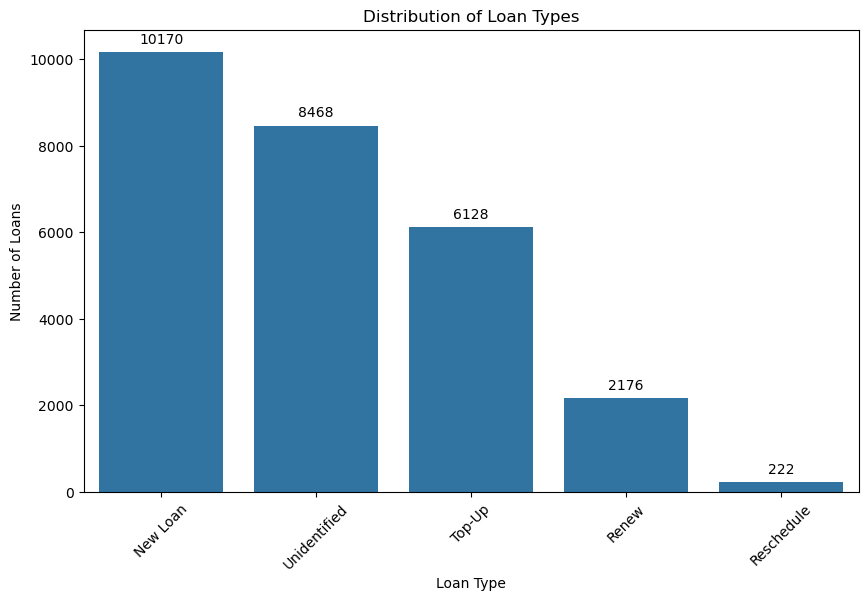

In [28]:
#distribution of the type of loans
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='LOAN_TYPE', data=filtered_df, order=filtered_df['LOAN_TYPE'].value_counts().index)
plt.title('Distribution of Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)

# Adding data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (0, 9), 
                  textcoords = 'offset points')
plt.show()


The above visual shows the distribution of the types of loans disbursed. A large number of these loan (16720 loans) could not be determined due to bad data entry and has been tagged as 'Unidentified'.

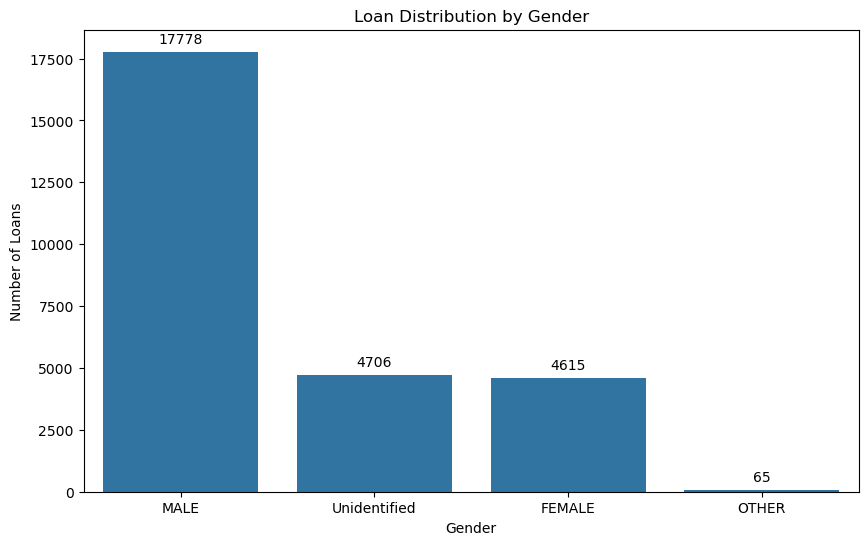

In [29]:
#Loan distribution for each gender
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='GENDER', data=filtered_df, order=filtered_df['GENDER'].value_counts().index)

# Adding data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (0, 9), 
                  textcoords = 'offset points')
    
plt.title('Loan Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Loans')
plt.show()

The above visual shows the distribution of customers' gender according to the loans that they receive. This shows that most loan recipients are Male. 12958 of these customers' genders could not be determined due to bad data entry and has been tagged as 'Unidentified'.

TREND ANALYSIS

In [30]:
monthly_data = filtered_df.set_index('VALUE_DATE').resample('M').agg({
    'DISBURSED__AMOUNT': 'sum',
    'PAID_AMOUNT': 'sum',
    'NO_IN_ARREARS': 'sum',
    'PRIN_ARREARS': 'sum',
    'INT_ARREARS': 'sum',
    'CHARGE_ARREARS': 'sum'
}).reset_index()

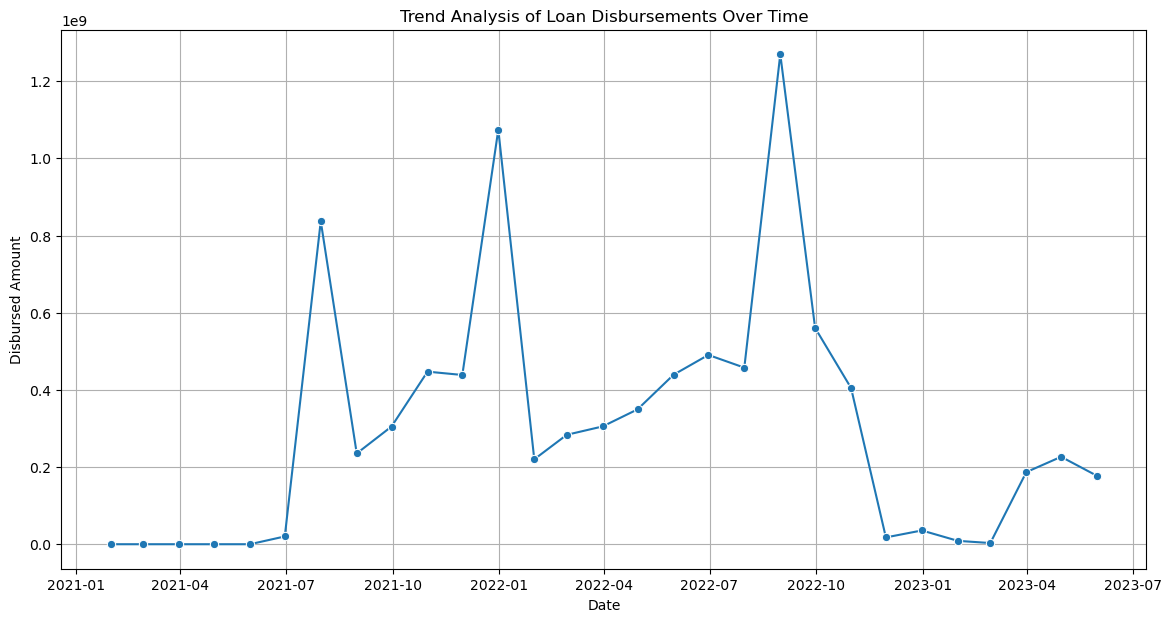

In [31]:
#Trend Analysis of Loan Disbursements Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='VALUE_DATE', y='DISBURSED__AMOUNT', data=monthly_data, marker='o')
plt.title('Trend Analysis of Loan Disbursements Over Time')
plt.xlabel('Date')
plt.ylabel('Disbursed Amount')
plt.grid(True)
plt.show()

The above visual shows the trend of disbursed loans over the years. In H2 2021, there was an upward trend in the amount of loans disbursed but it came down immediately after. (calculation is done in 1e9 i.e 1,000,000,000).

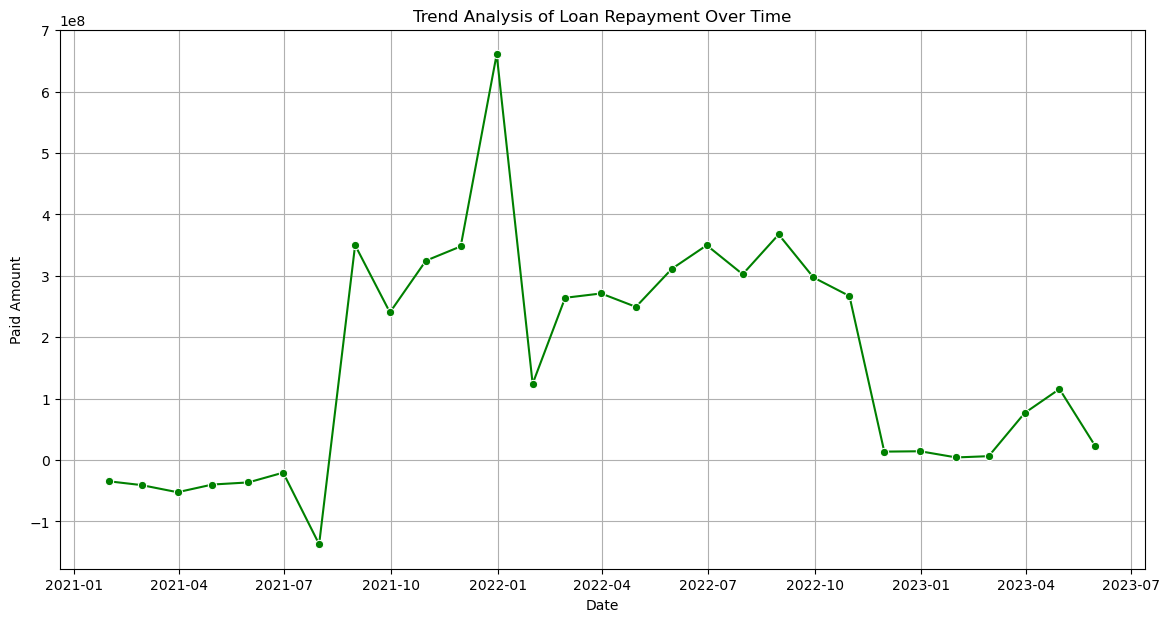

In [32]:
#Trend Analysis of Loan Repayment Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='VALUE_DATE', y='PAID_AMOUNT', data=monthly_data, marker='o', color='g')
plt.title('Trend Analysis of Loan Repayment Over Time')
plt.xlabel('Date')
plt.ylabel('Paid Amount')
plt.grid(True)
plt.show()

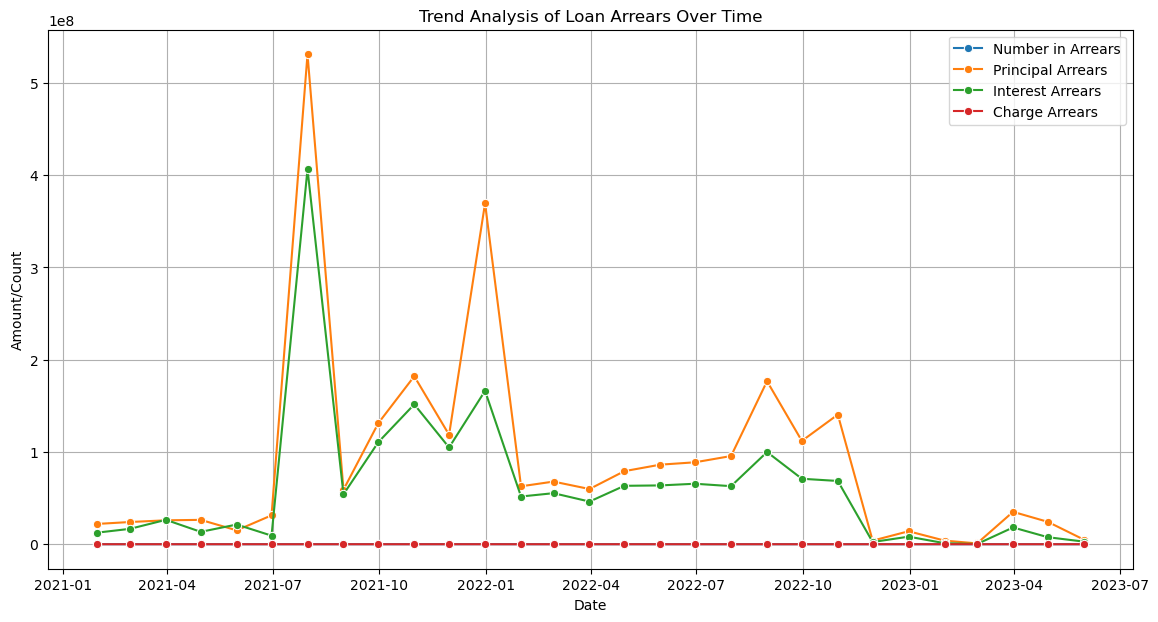

In [33]:
# Trend Analysis of Loan Arrears Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='VALUE_DATE', y='NO_IN_ARREARS', data=monthly_data, marker='o', label='Number in Arrears')
sns.lineplot(x='VALUE_DATE', y='PRIN_ARREARS', data=monthly_data, marker='o', label='Principal Arrears')
sns.lineplot(x='VALUE_DATE', y='INT_ARREARS', data=monthly_data, marker='o', label='Interest Arrears')
sns.lineplot(x='VALUE_DATE', y='CHARGE_ARREARS', data=monthly_data, marker='o', label='Charge Arrears')
plt.title('Trend Analysis of Loan Arrears Over Time')
plt.xlabel('Date')
plt.ylabel('Amount/Count')
plt.legend()
plt.grid(True)
plt.show()

TIME SERIES ANALYSIS - LINEAR REGRESSION

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
filtered_df['VALUE_DATE'] = pd.to_datetime(filtered_df['VALUE_DATE'])
aggregated_df = filtered_df.groupby('VALUE_DATE', as_index=False)['DISBURSED__AMOUNT'].sum()

print(aggregated_df)

    VALUE_DATE  DISBURSED__AMOUNT
0   2021-01-01               0.22
1   2021-01-02               0.01
2   2021-01-03               0.04
3   2021-01-04               0.02
4   2021-01-05               0.02
..         ...                ...
596 2023-05-18        12402802.71
597 2023-05-19         5952251.40
598 2023-05-22         3554863.32
599 2023-05-23         5396213.29
600 2023-05-24         3880000.00

[601 rows x 2 columns]


In [36]:
# Creating time series data
df_ts = aggregated_df[['VALUE_DATE','DISBURSED__AMOUNT']].set_index('VALUE_DATE')
df_ts.head()

DISBURSED__AMOUNT
VALUE_DATE                   
2021-01-01               0.22
2021-01-02               0.01
2021-01-03               0.04
2021-01-04               0.02
2021-01-05               0.02

In [37]:
# Continuing with time series analysis using linear model
df_ts.shape

(601, 1)

In [38]:
# check for nan values
df_ts.isnull().sum()

DISBURSED__AMOUNT    0
dtype: int64

In [39]:
# resampling df_ts to show date for every day between the start date to end date of the data
df_ts=df_ts.resample('D').sum()
df_ts.shape

(874, 1)

<Axes: xlabel='VALUE_DATE'>

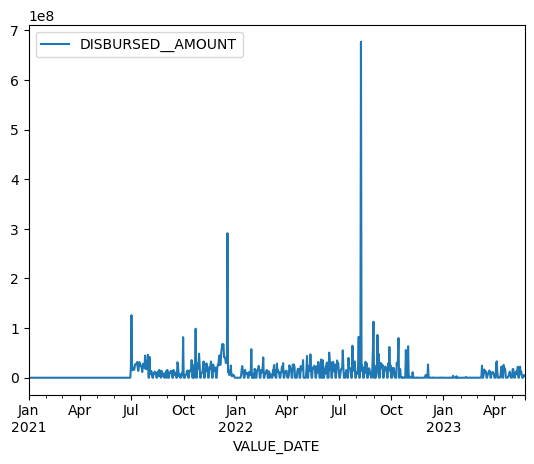

In [40]:
df_ts.plot()

Text(0, 0.5, 'Disbursed amount [100 Million]')

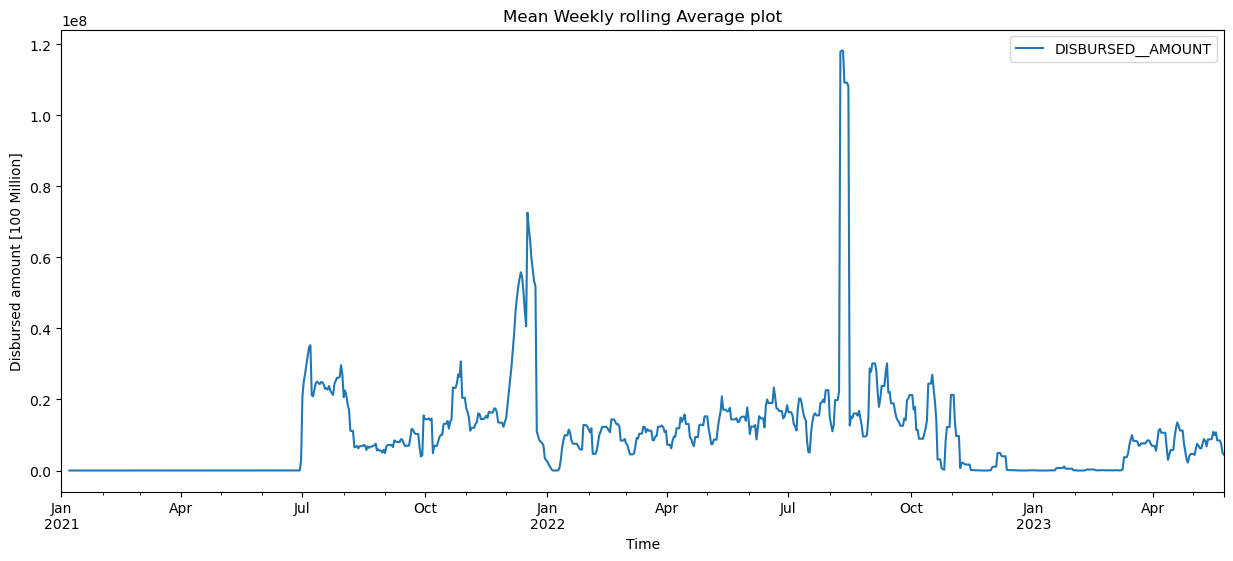

In [41]:
# creating a rolling average to visuallize the data on a weekly basis
fig, ax = plt.subplots(figsize=(15, 6))
df_ts.rolling(7).mean().plot(ax=ax,title='Mean Weekly rolling Average plot')
plt.xlabel('Time')
plt.ylabel('Disbursed amount [100 Million]')

Text(0, 0.5, 'Disbursed amount [10 Million]')

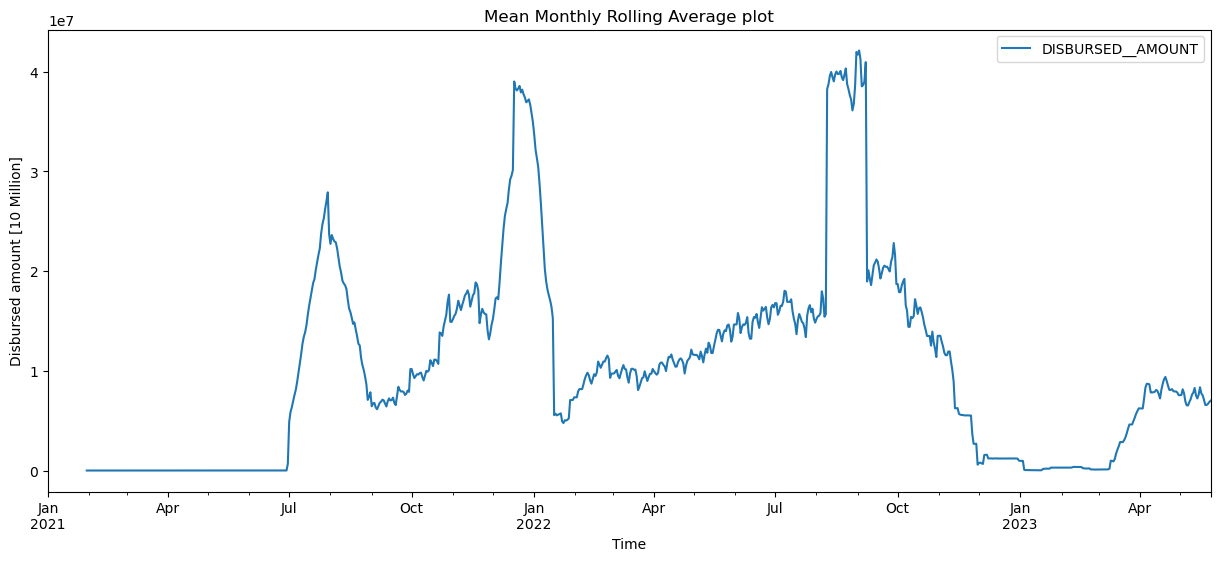

In [42]:
# creating a rolling average to visuallize the data on a monthly basis
fig, ax = plt.subplots(figsize=(15, 6))
df_ts.rolling(30).mean().plot(ax=ax,title='Mean Monthly Rolling Average plot')
plt.xlabel('Time')
plt.ylabel('Disbursed amount [10 Million]')

In [43]:
# creating a mask to remove data disbused amounts less than 500
df_ts_masked = df_ts[(df_ts.DISBURSED__AMOUNT > 500) & (df_ts.DISBURSED__AMOUNT < 60_000_000)]
# df_ts_masked = df_ts[df_ts.DISBURSED__AMOUNT > 500]
df_ts_masked.shape

(415, 1)

In [44]:
# creating a new feature for linear regression by making a lag feature for the disbursed amount
# this was done using the previous day's disbursed amount to predict the current day's disbursed amount 
df_ts_masked['DISBURSED__AMOUNT_L1'] = df_ts_masked.DISBURSED__AMOUNT.shift(1)
df_ts_masked.dropna(inplace=True)
df_ts_masked.shape

(414, 2)

<Axes: >

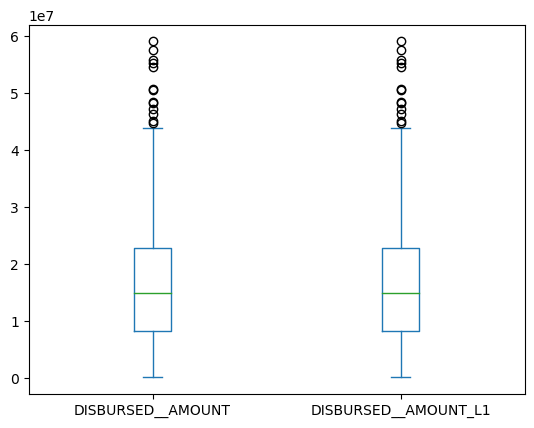

In [45]:
df_ts_masked.plot(kind='box')

In [46]:
# checking the correlation between the two disbuserd amount
df_ts_masked.corr()

DISBURSED__AMOUNT  DISBURSED__AMOUNT_L1
DISBURSED__AMOUNT              1.000000              0.405784
DISBURSED__AMOUNT_L1           0.405784              1.000000

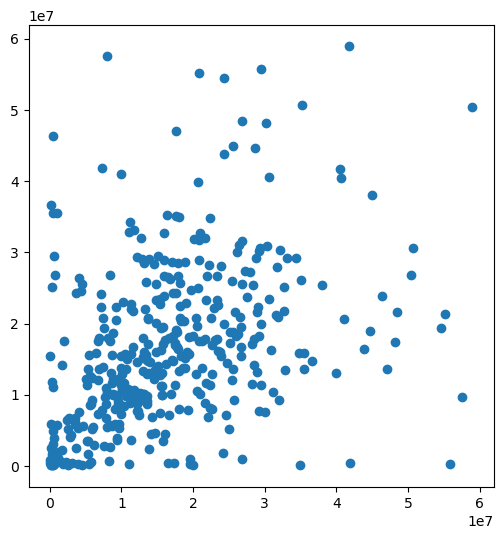

In [47]:
# plotting the correlation to using a scatter plot to easly visualize the data
fig,ax= plt.subplots(figsize=(6,6))
ax.plot([0,120],[0,120], linestyle='--',color='orange')
ax.scatter(x=df_ts_masked.DISBURSED__AMOUNT,y=df_ts_masked.DISBURSED__AMOUNT_L1)
plt.show()

In [48]:
# creating a rolling average with the the new dataframe
px.line(df_ts_masked.DISBURSED__AMOUNT.rolling(30).mean())

In [49]:
# Split the data for the model
target = 'DISBURSED__AMOUNT'
y=df_ts_masked[target]
print(y.head())
X=df_ts_masked.drop(columns=target)
print(X.head())

VALUE_DATE
2021-06-30    20000000.04
2021-07-02    29457670.88
2021-07-03    15127877.00
2021-07-04    18831697.39
2021-07-05    17759509.14
Name: DISBURSED__AMOUNT, dtype: float64
            DISBURSED__AMOUNT_L1
VALUE_DATE                      
2021-06-30             150000.01
2021-07-02           20000000.04
2021-07-03           29457670.88
2021-07-04           15127877.00
2021-07-05           18831697.39


In [50]:
# dividing the data into train and test set
cuttoff = int(len(df_ts_masked)*0.90)
X_train = X[:cuttoff]
X_test = X[cuttoff:]
y_train = y[:cuttoff]
y_test = y[cuttoff:]

In [51]:
# Creating a linear model to model the data
#Test MAE should < Training MAE
model = LinearRegression()
model.fit(X_train,y_train)
training_mae = mean_absolute_error(y_train,model.predict(X_train))
test_mae = mean_absolute_error(y_test,model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 8053130.92
Test MAE: 6938434.01


In [52]:
# model equation
# y=mx+c. m=0.4, P2=y, X=P2.L1, C= 10210081.82

intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)[0]

print(f"P2 = {intercept} + ({coefficient} * P2.L1)")

P2 = 10210081.82 + (0.4 * P2.L1)


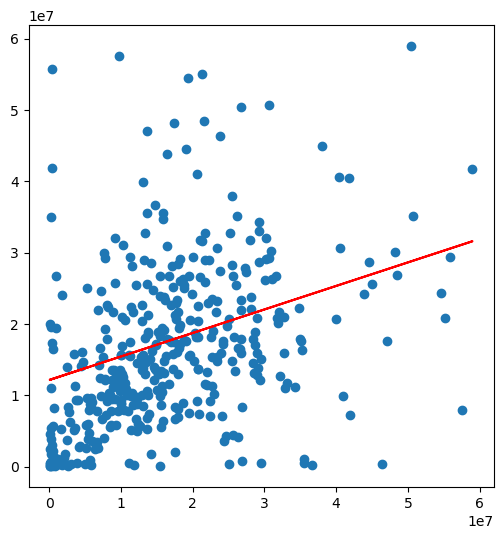

In [53]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df_ts_masked.DISBURSED__AMOUNT_L1, (12155600.32 + (0.33 * df_ts_masked.DISBURSED__AMOUNT_L1)), color='red')
scatter = ax.scatter(y=df_ts_masked.DISBURSED__AMOUNT, x=df_ts_masked.DISBURSED__AMOUNT_L1)
plt.show()

In [54]:
# Creating another dataframe to show the two data point
df_pred_test = pd.DataFrame(
    {'y_test':y_test,
    'y_pred':model.predict(X_test)
    })
df_pred_test.head()

y_test        y_pred
VALUE_DATE                           
2023-03-23  14601713.00  1.506373e+07
2023-03-24  12206260.00  1.600584e+07
2023-03-27   9830485.00  1.505503e+07
2023-03-28  10620395.66  1.411203e+07
2023-03-29  11727810.00  1.442556e+07

In [55]:
fig = px.line(df_pred_test, labels={"value":'P2'})
fig.show();

The linear model performed well i.e it's predictive figure is close to the actual figure that was tested

AUTOREGREGRESSION MODEL WITH WALK FORWARD VALIDATION

In [56]:
# importing the libraries we will be using
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

In [57]:
# filtering df_ts to show values greater than 500 and less than 60,000,000
df_AR = df_ts.copy()
# data = df_AR[df_AR.DISBURSED__AMOUNT >500]
# data = df_AR[(df_AR.DISBURSED__AMOUNT > 500) & (df_AR.DISBURSED__AMOUNT < 60_000_000)]
data = df_AR
# getting our data and turning it to a series because of the nature of the time series data is single columnn
data = data.DISBURSED__AMOUNT
data.shape

(874,)

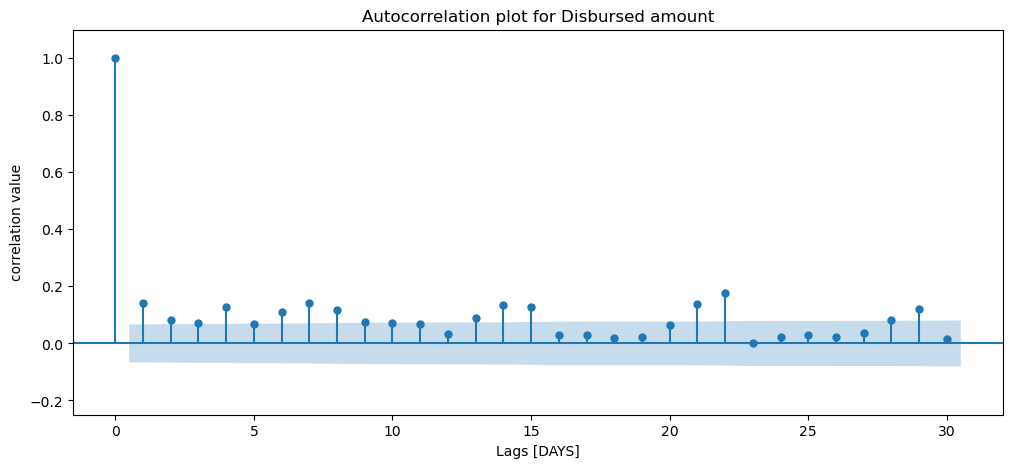

In [58]:
# ploting auto correlation plot to see how the disbursed amount is correlated to it previous lag values
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(data,ax=ax,title='Autocorrelation plot for Disbursed amount')
plt.ylabel('correlation value')
plt.ylim(-0.25,1.1)
plt.xlabel('Lags [DAYS]')
plt.show()

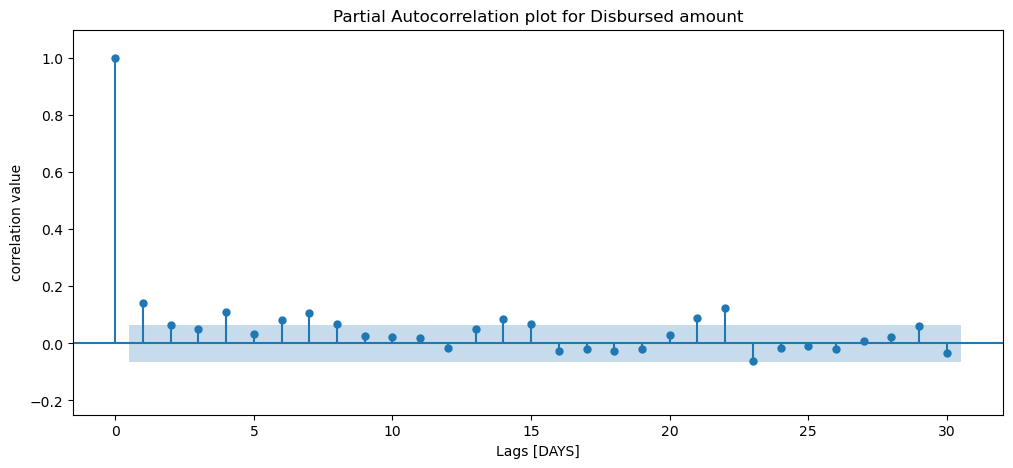

In [59]:
# Ploting the Partial auto correlation plot to determine the number of p(order/lag) values to use for the AR model
fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(data,ax=ax,title='Partial Autocorrelation plot for Disbursed amount')
plt.ylabel('correlation value')
plt.ylim(-0.25,1.1)
plt.xlabel('Lags [DAYS]')
plt.show()

When the lag is out of the blue band, the predictive power is statistically significant

In [60]:
# splitting the data in train and test set
cuttoff = int(len(data)*0.9)
y_train = data.iloc[:cuttoff]
y_test = data.iloc[cuttoff:]

In [61]:
# instantiating the model and training it with the train data
model = AutoReg(y_train,lags=4).fit()

In [62]:
y_train

VALUE_DATE
2021-01-01         0.22
2021-01-02         0.01
2021-01-03         0.04
2021-01-04         0.02
2021-01-05         0.02
                ...    
2023-02-21         0.00
2023-02-22    287065.66
2023-02-23         0.00
2023-02-24         0.00
2023-02-25         0.00
Freq: D, Name: DISBURSED__AMOUNT, Length: 786, dtype: float64

In [63]:
model.resid

VALUE_DATE
2021-01-05   -7.137874e+06
2021-01-06   -7.137874e+06
2021-01-07   -7.137874e+06
2021-01-08   -7.137874e+06
2021-01-09   -7.137874e+06
                  ...     
2023-02-21   -7.187303e+06
2023-02-22   -6.850809e+06
2023-02-23   -7.171988e+06
2023-02-24   -7.152668e+06
2023-02-25   -7.149188e+06
Freq: D, Length: 782, dtype: float64

In [64]:
# calculating the MAE for the train and test data set
mae_train = mean_absolute_error(y_train[10:],model.predict()[10:])
print(f'The MAE of the train set is: {mae_train}')
print()
mae_test  = mean_absolute_error(y_test,model.predict(y_test.index.min(),y_test.index.max()))
print(f'The MAE of the test set is: {mae_test}')

The MAE of the train set is: 11423652.42979145

The MAE of the test set is: 7468275.393262159


In [65]:
# generating a dataframe that will be used to plot the graph of y_test and y_pred
y_pred = model.predict(y_test.index.min(),y_test.index.max())
df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred}, index=y_test.index
)

fig=px.line(df_pred_test)
fig.show()

In [66]:
# creating a Dataframe to store the original data and the prediction and ploting it with plotly express
frame =pd.DataFrame({'data':data,'pred':model.predict(data.index.min(),data.index.max())})
px.line(frame)

The autoregression model did not perform well on its own

Implemeting walk forward validation to the Auto regression model

Walkthrough autoregression trains with all the data on the y axis. Increasing the lag makes the MAE more accurate

In [67]:
%%capture
# creating an empty series called y_pred_wfv to store the forecast for each iteration
# History is a copy of y_train where the values of prediction are appended to and then used to make the next forecast
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    # instantiate the model
    # try editing the value of lags and see how the model is improved as lags is increased up to 50
    model = AutoReg(history,lags=4).fit()
    # generate next forecast for the next date index
    next_pred = model.forecast()
    # append the forecast prediction to y_pred_wfv
    y_pred_wfv = y_pred_wfv._append(next_pred)
    # append the y_te
    history = history._append(y_test[next_pred.index])

In [68]:
# calculating the MAE for the prediction
mae_wfv = mean_absolute_error(y_test,y_pred_wfv)
print(f'The MAE for the Walkforward validation is: {mae_wfv}')

The MAE for the Walkforward validation is: 6931298.95316506


With the walk forward validation, we have a better MAE than the auto regression model

In [69]:
# creating a Dataframe to store the original data and the prediction and ploting it with plotly express
frame =pd.DataFrame({'y_test':y_test,'pred':y_pred_wfv})
px.line(frame)

In [70]:
# Generating model parameter
model.params

const                   6.877417e+06
DISBURSED__AMOUNT.L1    1.223575e-01
DISBURSED__AMOUNT.L2    5.088877e-02
DISBURSED__AMOUNT.L3    3.775952e-02
DISBURSED__AMOUNT.L4    1.094213e-01
dtype: float64

ARIMA MODEL

In [71]:
# import the needed library
from statsmodels.tsa.arima.model import ARIMA
import time

In [72]:
# becasuse of the computation nature of ARIMA model, I would created a test set that have readinng for the last 30 day
# and the y_train will be for the last one year up to the day before the last 30 days
y_train=data.iloc[:-30]
y_test=data.iloc[-30:]

In [73]:
# assigning hyperparameter for the model
# p_params represent the lags in the model while q_param represent the error lag for MA part of the ARMA model
p_params = range(0,21,8)
q_params = range(0,3,1)

In [74]:
# Create dictionary to store MAEs
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 0, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(y_train,order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(y_train,y_pred)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)

Trained ARIMA (0, 0, 0) in 0.03 seconds.
Trained ARIMA (0, 0, 1) in 0.09 seconds.
Trained ARIMA (0, 0, 2) in 0.13 seconds.
Trained ARIMA (8, 0, 0) in 0.28 seconds.
Trained ARIMA (8, 0, 1) in 1.0 seconds.
Trained ARIMA (8, 0, 2) in 2.51 seconds.
Trained ARIMA (16, 0, 0) in 1.64 seconds.
Trained ARIMA (16, 0, 1) in 4.36 seconds.
Trained ARIMA (16, 0, 2) in 7.6 seconds.

{0: [12103031.14533967, 11556482.217466531, 11391026.12635557], 8: [10099783.001851637, 9811393.605867343, 9789993.832373686], 16: [9703667.824701719, 9711269.002356652, 9522867.003495669]}


In [75]:
# Turning the mae_grid to a datafram
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

0             8             16
0  1.210303e+07  1.009978e+07  9.703668e+06
1  1.155648e+07  9.811394e+06  9.711269e+06
2  1.139103e+07  9.789994e+06  9.522867e+06

Text(0.5, 1.0, 'ARIMA Grid Search (Criterion: MAE)')

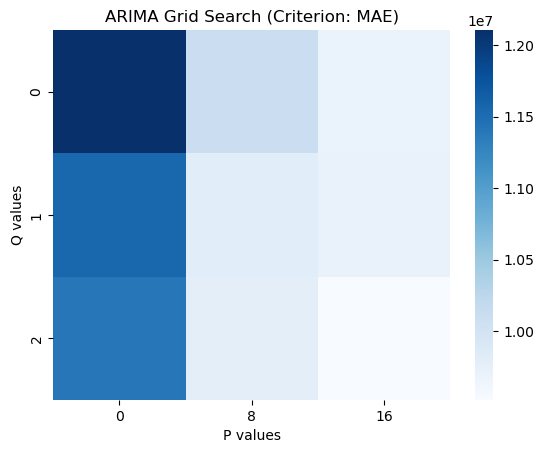

In [76]:
# visualizing the grid using a heatmap
sns.heatmap(mae_df,cmap='Blues')
plt.xlabel('P values')
plt.ylabel('Q values')
plt.title('ARIMA Grid Search (Criterion: MAE)')

In [77]:
# Building the final model base on best parameter and considering performance and time it took to run
y_pred_wfv = pd.Series()
history = y_train.copy()
total = len(y_test)
for i in range(total):
    print(f'{round(i/total * 100,2)}%',end='\r')
    model = ARIMA(history,order=(8,0,1)).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv._append(next_pred)
    history = history._append(y_test[next_pred.index])

In [78]:
test_mae = mean_absolute_error(y_test,y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 5707748.65


In [79]:
df_predictions = pd.DataFrame({'y_test':y_test,'y_pred_wfv':y_pred_wfv})
fig = px.line(df_predictions,labels={'value':'PM2.5'})
fig.show()

The ARIMA model performed well